# Численное дифференцирование

## Введение 
Цель - сравнить абсолютные погрешности разных формул для численного вычисления производной. 

## Методология
В качестве референса берем значение 
аналитически полученной производной в точке. Набор функций для исследования: 
$\sin(x^2)$, $\cos(\sin(x))$, $\exp(\sin(\cos(x)))$, $\ln(x+3)$, $(x+3)^{0.5}$.

Исследуемые формулы:
1. $\frac{f(x+h)-f(x)}{h}$
2. $\frac{f(x)-f(x-h)}{h}$
3. $\frac{f(x+h)-f(x-h)}{2h}$
4. $\frac{4}{3}\frac{f(x+h)-f(x-h)}{2h}-\frac{1}{3}\frac{f(x+2h)-f(x-2h)}{4h}$
5. $\frac{3}{2}\frac{f(x+h)-f(x-h)}{2h}-\frac{3}{5}\frac{f(x+2h)-f(x-2h)}{4h}+\frac{1}{10}\frac{f(x+3h)-f(x-3h)}{6h}$

Здесь $h$ - шаг дифференцирования, для каждой формулы путем его варьирования получим график абсолютной погрешности
результата $\Delta(h)$, $h_{n}=\frac{2}{2^n}$, $n=\overline{1,21}$. Точку выберем произвольно, $x_0 = 0.5$.

## Исследование

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import sympy as sp

# Исследуемые функции
fs = [
  lambda x: sp.sin(x * x), lambda x: sp.cos(sp.sin(x)),
  lambda x: sp.exp(sp.sin(sp.cos(x))), lambda x: sp.log(x + 3), lambda x:
  (x + 3)**0.5
]

In [45]:
# Исследуемые методы численного дифференцирования
deriv_eval_methods = [
  lambda f, x, h: (f(x + h) - f(x)) / h, lambda f, x, h: (f(x) - f(x - h)) / h,
  lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h), lambda f, x, h: (4 / 3) *
  (f(x + h) - f(x - h)) / (2 * h) - (1 / 3) * (f(x + 2 * h) - f(x - 2 * h)) /
  (4 * h), lambda f, x, h: (3 / 2) * (f(x + h) - f(x - h)) / (2 * h) -
  (3 / 5) * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h) + (1 / 10) *
  (f(x + 3 * h) - f(x - 3 * h)) / (6 * h)
]

labels = [f'({i})' for i in range(1, len(deriv_eval_methods) + 1)]

In [57]:
def plot_abs_error(f):
  plt.figure(figsize=(16, 8))
  plt.grid(which='major')
  plt.grid(which='minor', linestyle='--')
  plt.minorticks_on()

  x = sp.symbols('x')
  plt.title(f'${sp.latex(f(x))}$')

  deriv = sp.lambdify(x, sp.diff(f(x), x), 'numpy')
  x_0 = 0.5

  h = np.logspace(-20, 0, 1000, base=2)
  for l, dem in zip(labels, deriv_eval_methods):
    abs_err = [np.abs(dem(f, x_0, s) - deriv(x_0)) for s in h]
    plt.plot(h, abs_err, label=l)

  plt.xlabel(r'$h$')
  plt.ylabel(r'$\Delta$')
  plt.xscale('log', base=2)
  plt.yscale('log', base=2)
  plt.legend()

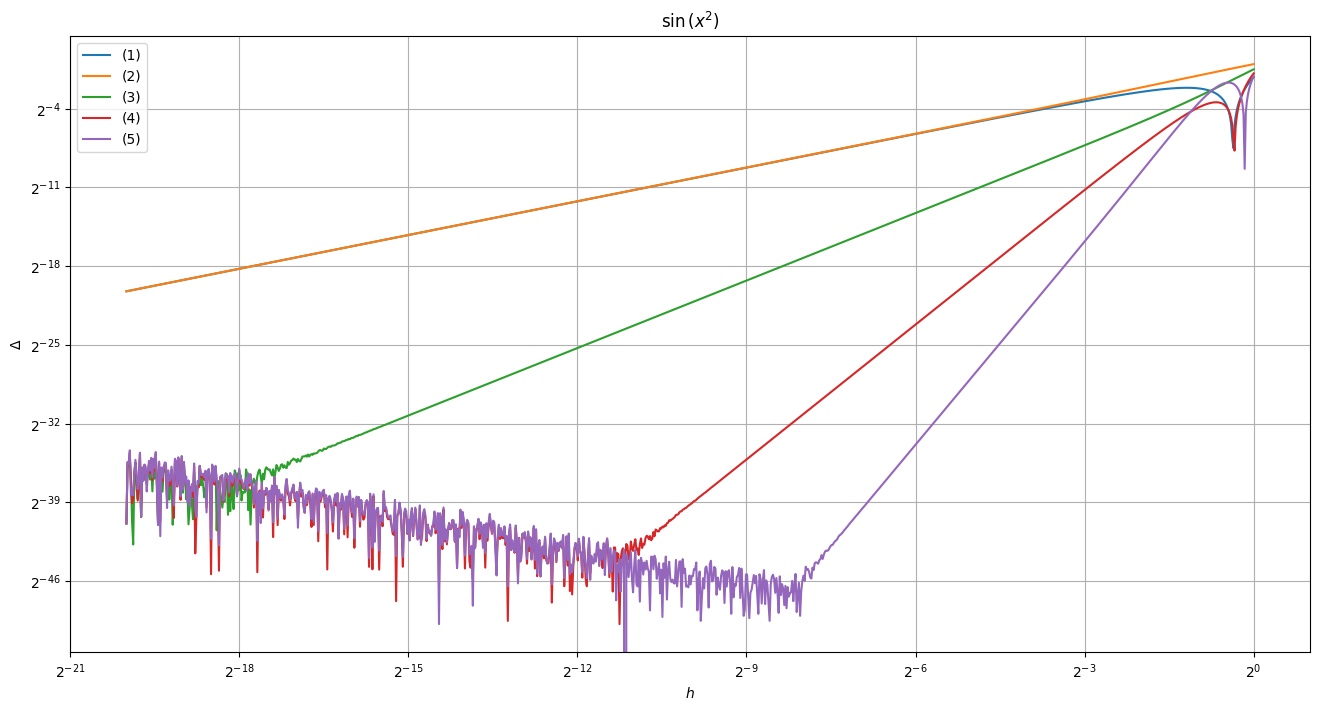

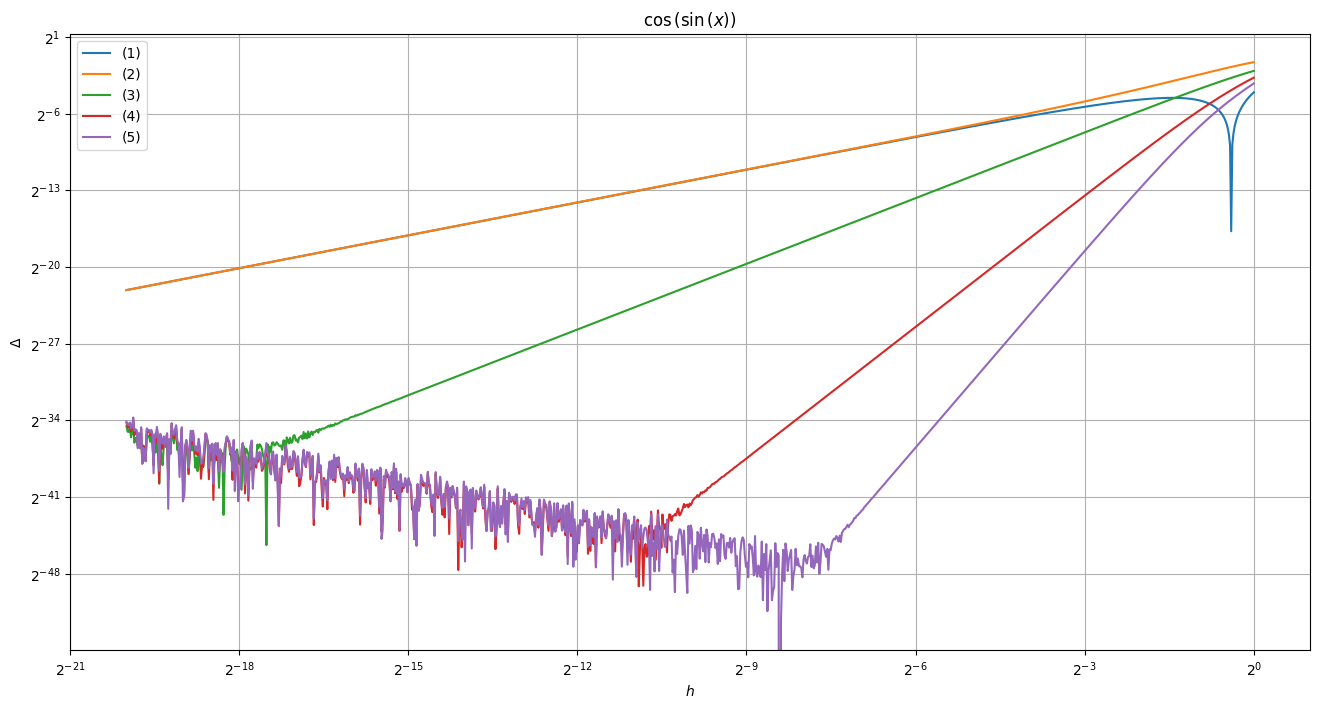

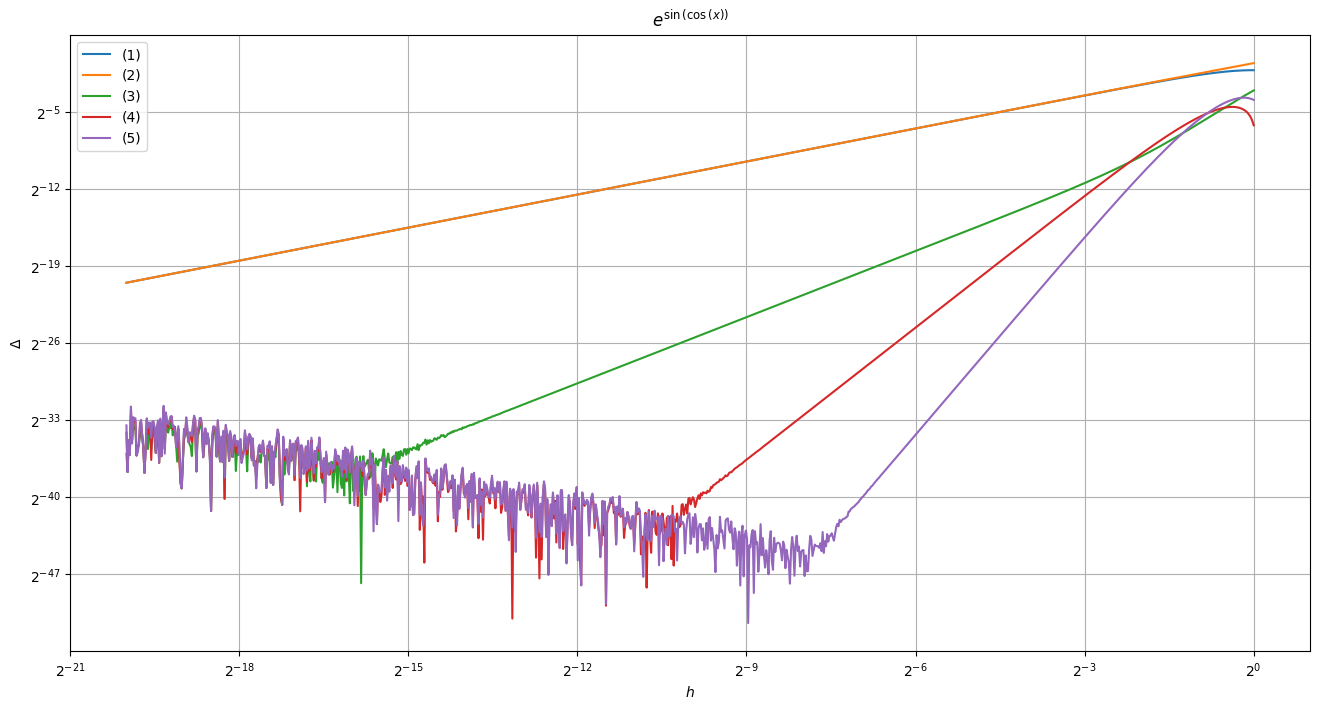

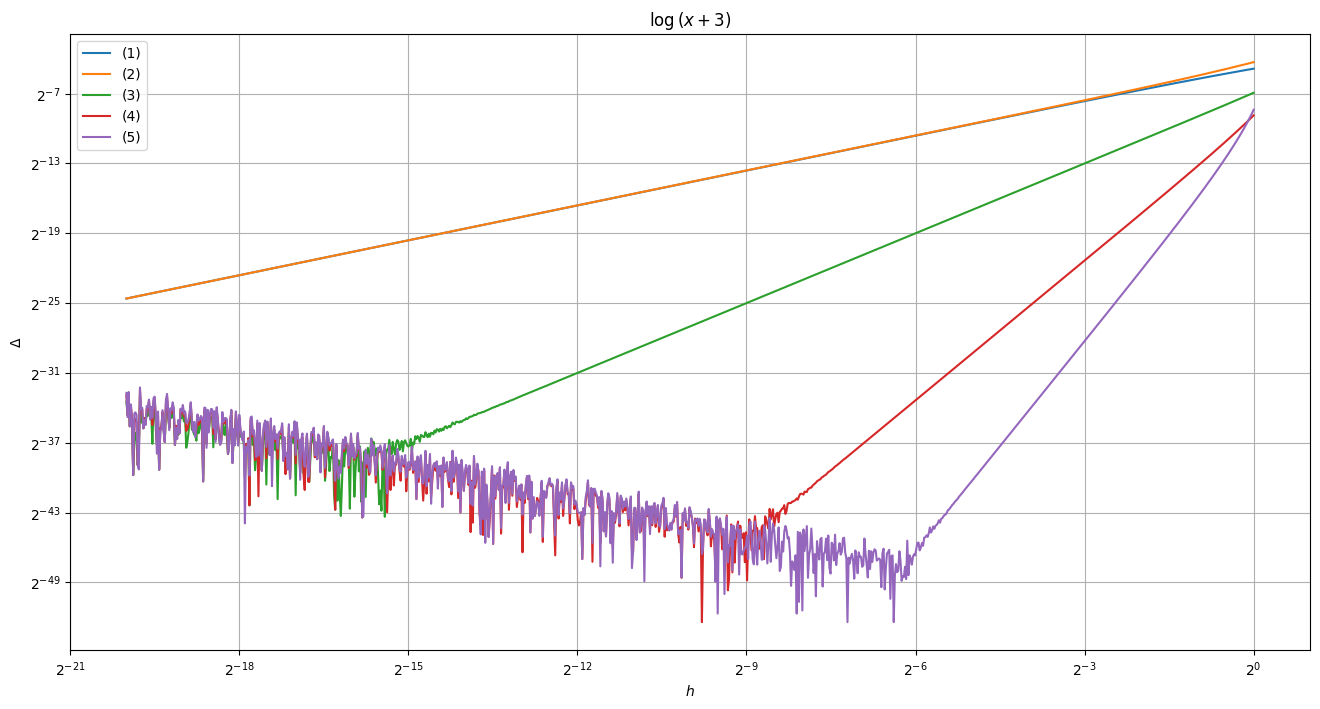

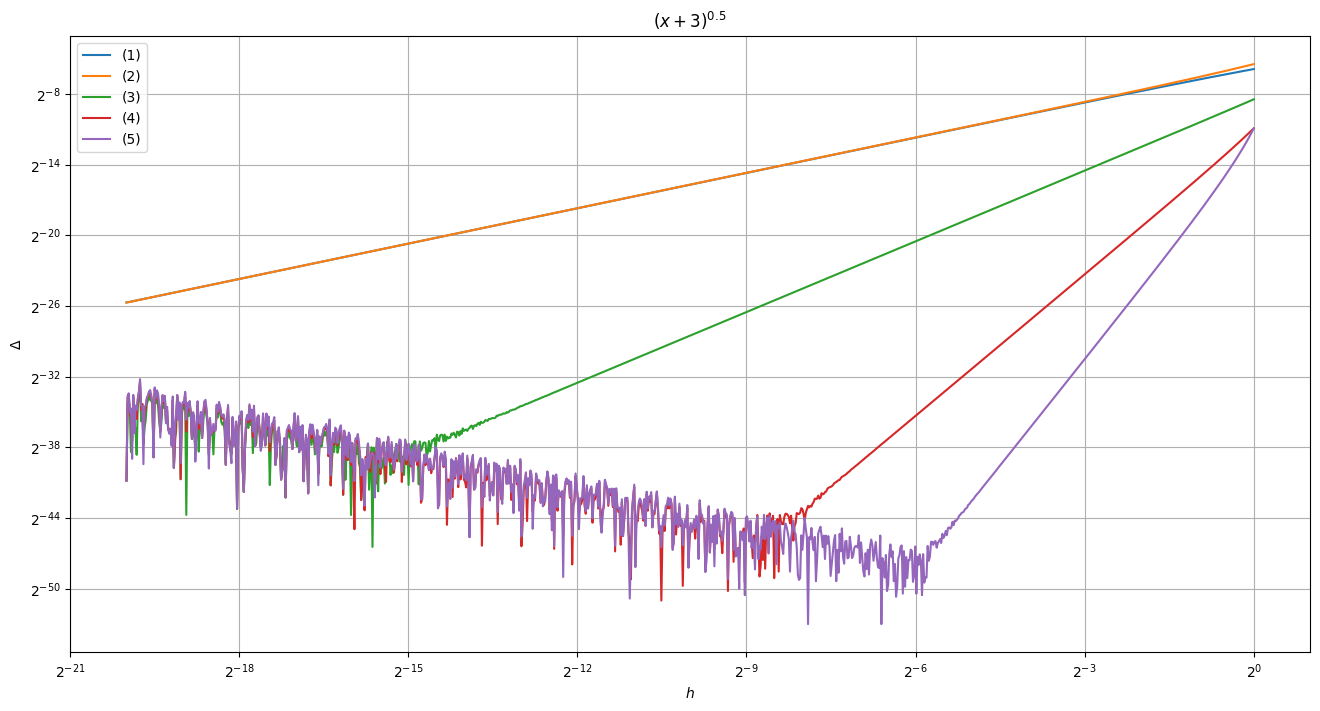

In [58]:
for f in fs:
  plot_abs_error(f)

## Обсуждение результатов

Все графики качественно схожи по виду. Возьмем для примера графики для $\sin(x^2)$ и проанализируем
каждый в отдельности. Далее номера пунктов соответствуют номерам формул:

1. В логарифмических координатах - почти прямая. Для примера формула погрешности для данного метода 
из ряда Тейлора: $\Delta = \left|\frac{f(x+h)-f(x)}{h}-f'(x)\right| = \sum_{n=1}^{\infty}\frac{f^{(n+1)}(x)h^n}{(n+1)!}$.
Для всех остальных методов формула $\Delta(h)$ будет иметь схожую структуру - степенной ряд.
Из того что график почти прямая заключаем, что это ряд неплохо приближается в данном 
случае первым членом: $\frac{f''(x)h}{2}$. Влияние погрешностей округления пренебрежимо мало,
для данной формулы оптимально выбирать $h$ как можно меньше в пределах исследованного
диапазона.
2. Практически совпадает с первым графиком, первый член ряда по модулю совпадает.
3. До $h\sim 2^{-18}$ заметно влияние погрешностей округления, в силу того что эта формула
намного точнее первых двух. Это заметно по порядку первого члена $\Delta(h)$: $h^2$.
Отсюда и более высокий наклон графика в дальнейшем. Оптимальный $h \sim 2^{-18}$.
4. Для этой формулы первый член погрешности имеет вид: $\frac{f^V(x)}{30}h^4$.
Имеем уточнение на 2 порядка по сравнению с формулой 3. Как следствие, оптимальное значение
$h\sim 2^{-11}$.
5. Формула для первого члена: $\frac{f^{VII}(x)}{140}h^6$. Оптимальный $h\sim 2^{-8}$.

## Вывод

Для точнейшего решения задачи численного дифференцирования следует продолжить
ряд формул 1-5 с большим числом слагаемых, чтобы увеличить порядок малости расхождения.
При этом выбор шага дифференцирования проще всего осуществить экспериментальным путем.